In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# save filepath to variable for easier access
house_pricing_path = '/home/cac9a146-0c24-457a-854b-ac1865bc8709/ML_Lab1/House Pricing.csv'

# read the data and store data in DataFrame titled house_pricing_data
house_pricing_data = pd.read_csv(house_pricing_path) 

# print a summary of the data in Melbourne data
house_pricing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
house_pricing_data.shape

(545, 13)

In [5]:
house_pricing_data.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

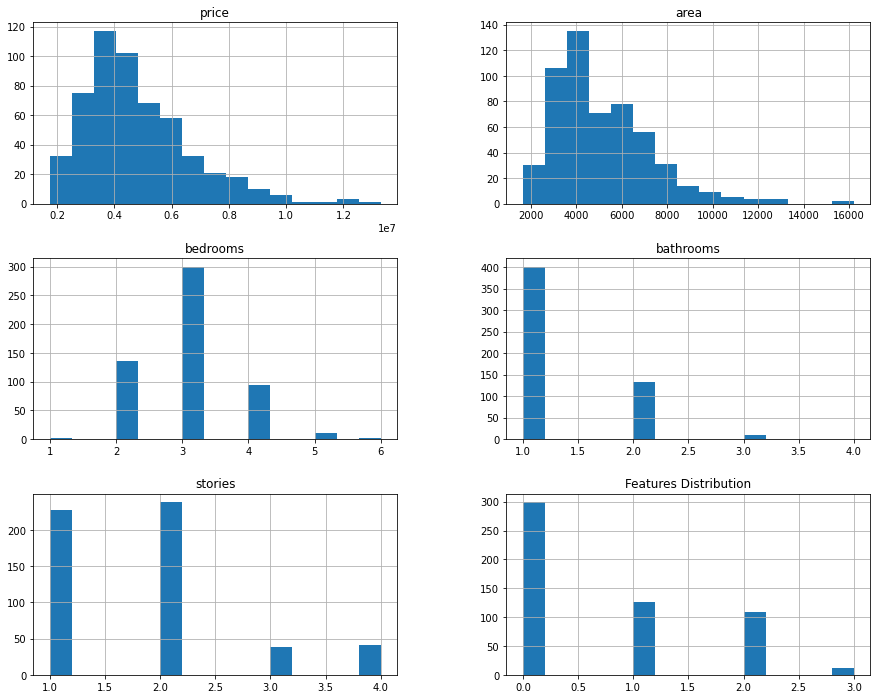

In [6]:
house_pricing_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

<Figure size 800x640 with 0 Axes>

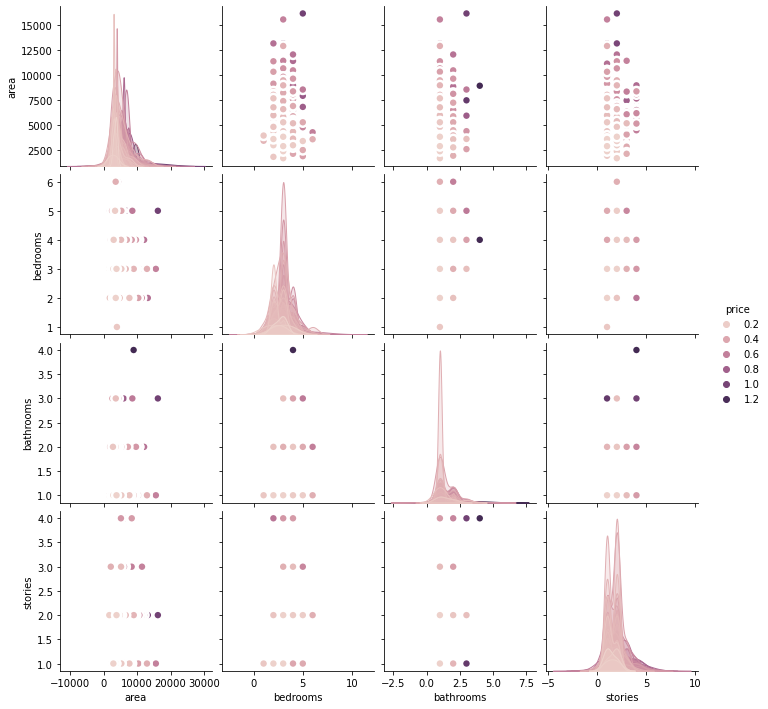

In [7]:
# pairplot with seaborn library
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(house_pricing_data.loc[:, ['price', 'area', 'bedrooms', 'bathrooms', 'stories']], 
             kind="scatter", hue="price", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

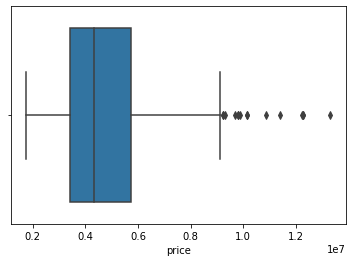

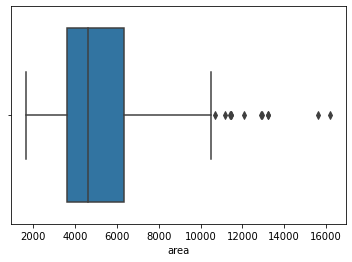

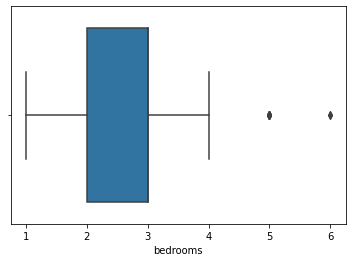

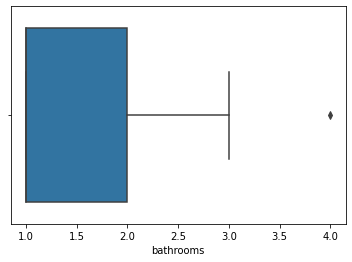

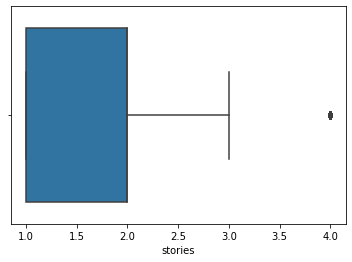

TypeError: Horizontal orientation requires numeric `x` variable.

In [9]:
# plot the boxplot of numerical variables
num_cols = house_pricing_data.columns.tolist()
for col in num_cols:
    sns.boxplot(x=house_pricing_data[col])
    plt.show()

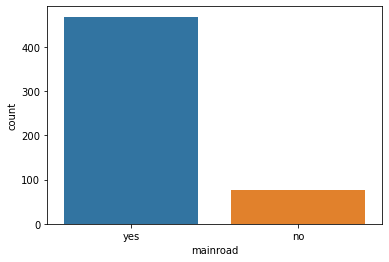

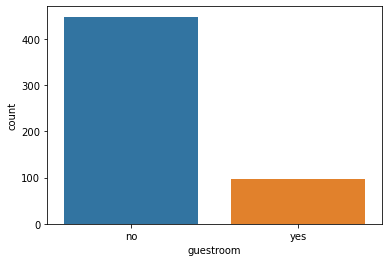

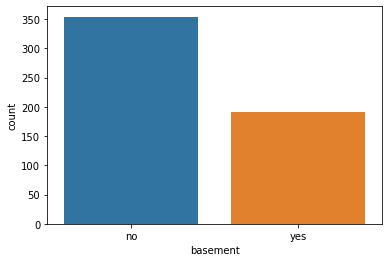

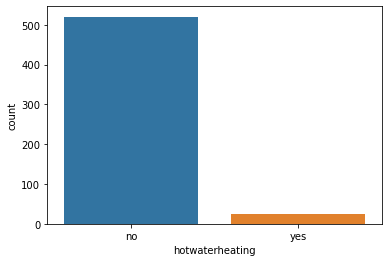

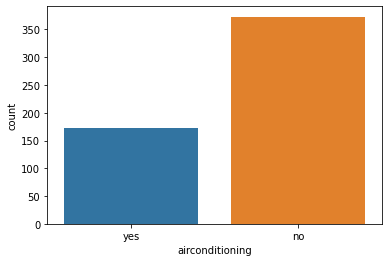

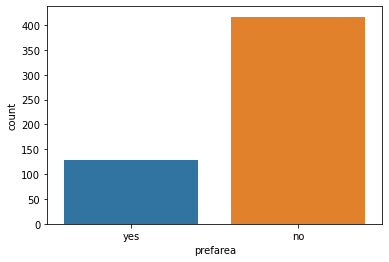

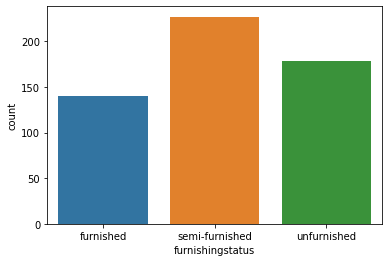

In [8]:
# plot the bar chart of categorical variables
cat_cols = house_pricing_data.select_dtypes(include="object").columns.tolist()
for col in cat_cols:
    sns.countplot(x=house_pricing_data[col])
    plt.show()

In [9]:
# check for missing values
missing_values = house_pricing_data.isnull().sum()

# print the number of missing values in each column
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
# Handling categorical variables in dataset

from sklearn.preprocessing import LabelEncoder

# List of categorical variables
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Loop through each variable and perform label encoding
for var in cat_vars:
    le = LabelEncoder()
    house_pricing_data[var] = le.fit_transform(house_pricing_data[var].astype(str))


In [26]:
# Scaling/normalizing numerical values 

from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler object to the data and transform the data
normalized_data = scaler.fit_transform(house_pricing_data)

# convert the normalized data back to a pandas dataframe
normalized_df = pd.DataFrame(normalized_data, columns=house_pricing_data.columns)


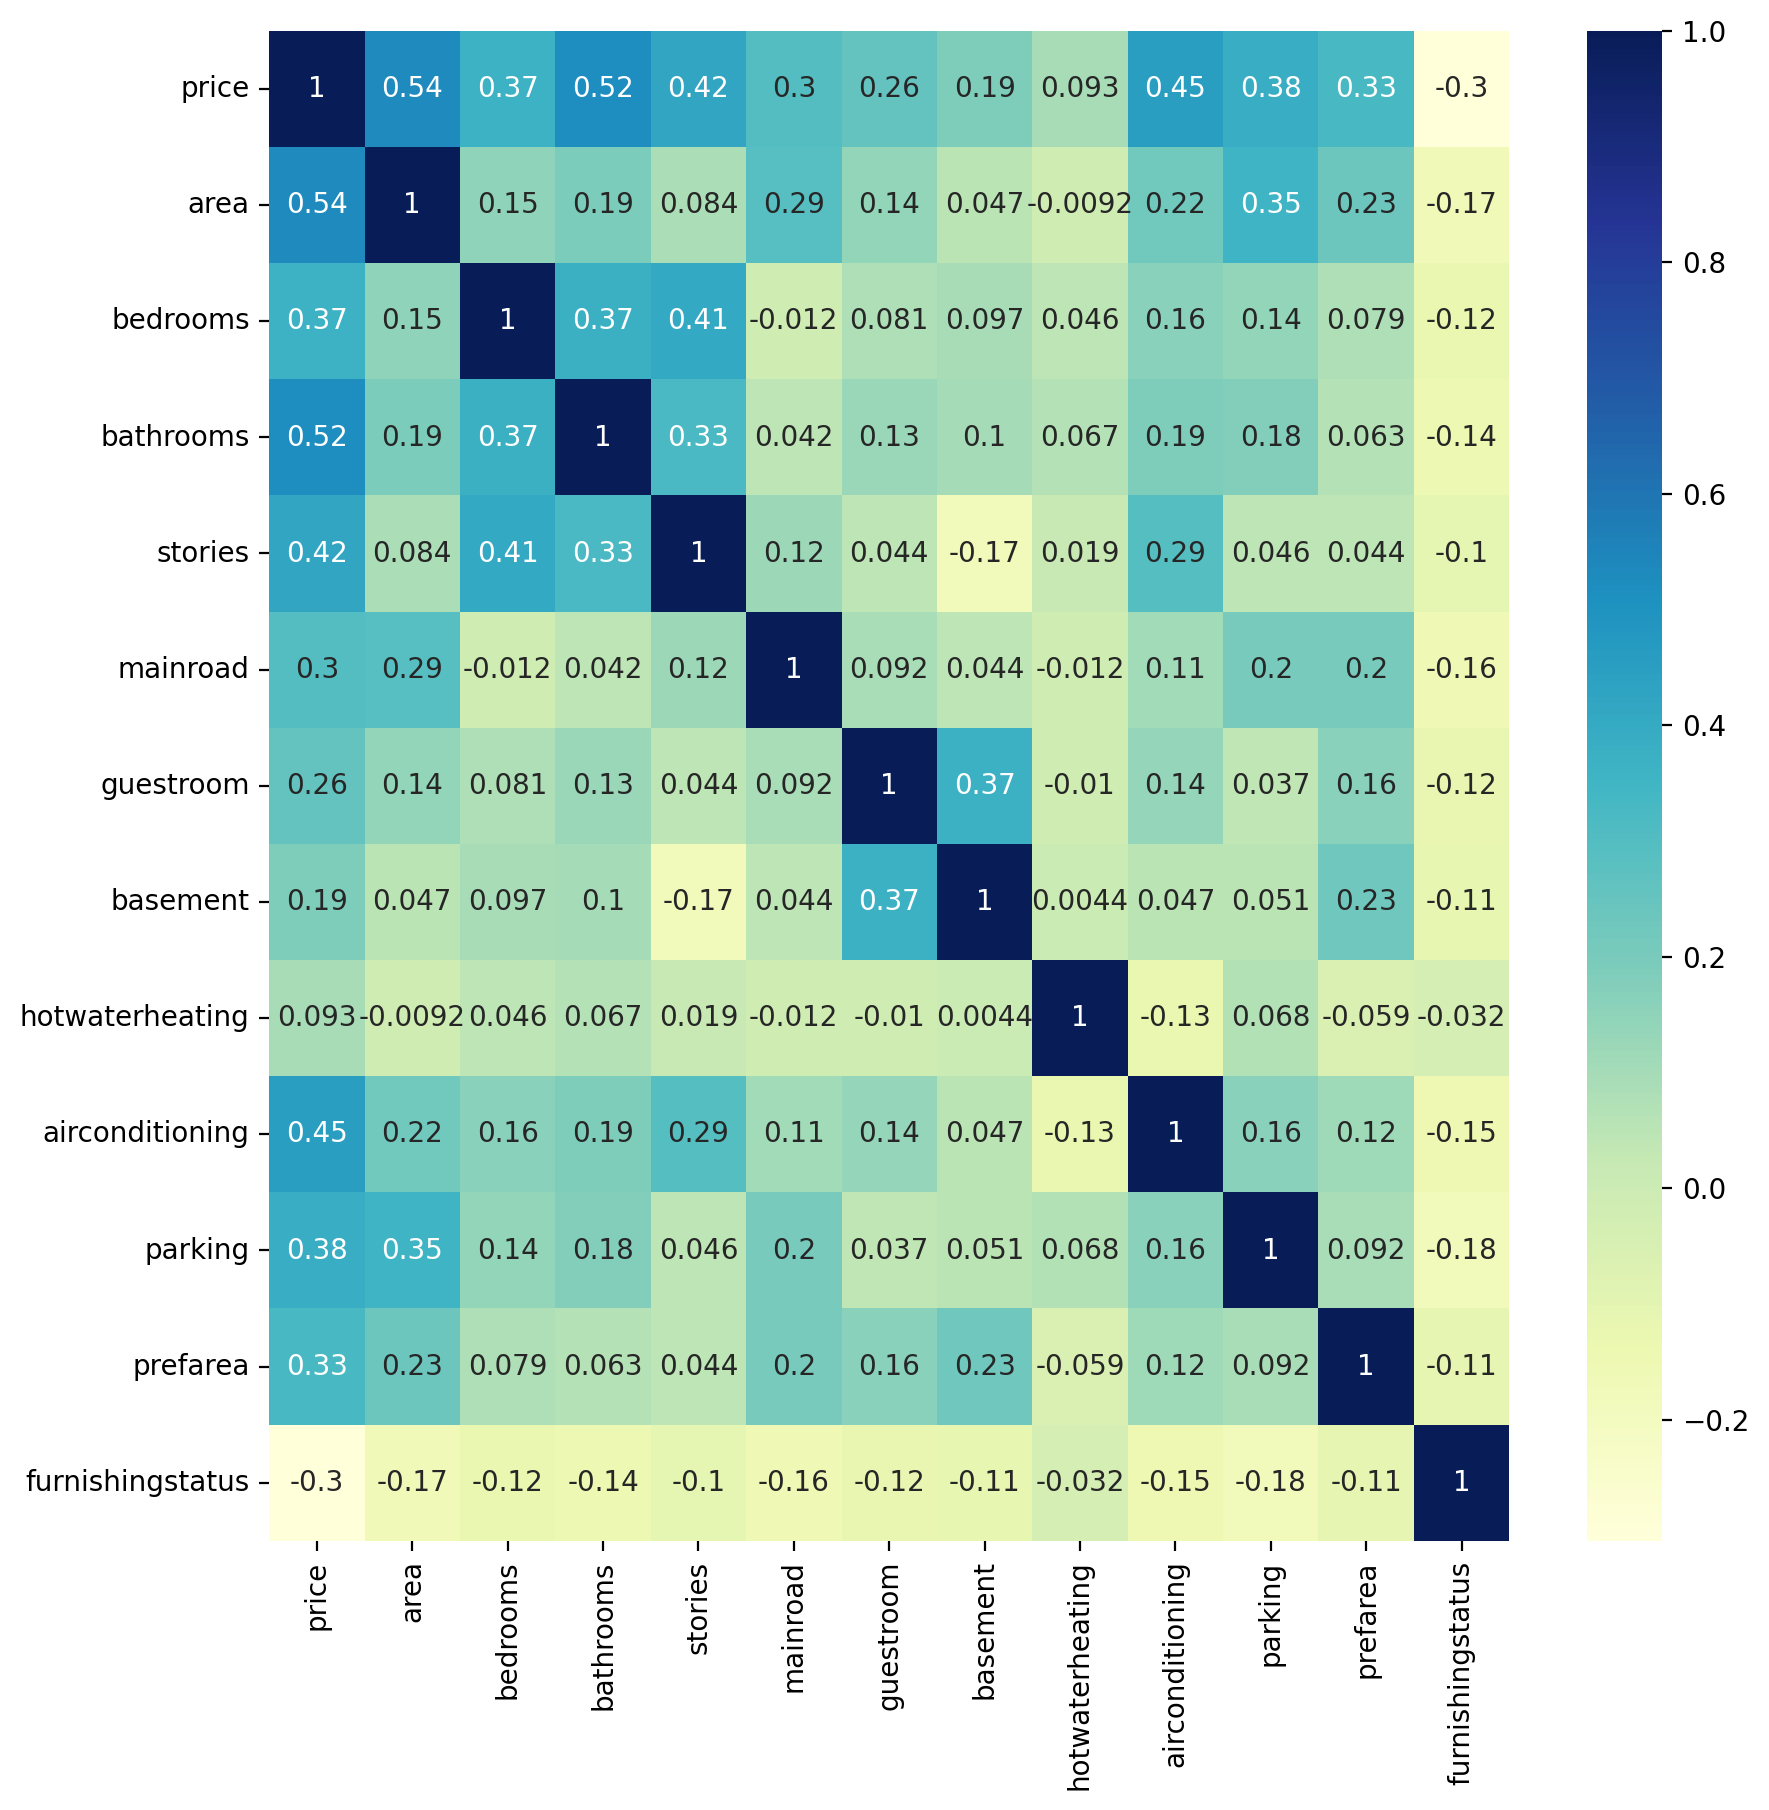

In [12]:
# plot the correlation matrix for feature selection
corr_matrix = normalized_df.corr()
fig = plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [27]:
# Split dataset into training and testing sets for model evaluation

from sklearn.model_selection import train_test_split

X_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea', 'furnishingstatus']

# split the dataset into features and target variable
X = normalized_df.drop(X_vars, axis=1) #drop the unwanted column
y = normalized_df['price']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print(X_train)

        price      area  bedrooms  bathrooms   stories  airconditioning  \
46   0.500000  0.298969       0.4   0.333333  1.000000              1.0   
93   0.393939  0.381443       0.4   0.333333  0.000000              1.0   
335  0.187879  0.148866       0.2   0.000000  0.000000              1.0   
412  0.145455  0.065979       0.4   0.000000  0.333333              0.0   
471  0.109091  0.144330       0.4   0.000000  0.333333              0.0   
..        ...       ...       ...        ...       ...              ...   
71   0.433333  0.298969       0.6   0.333333  1.000000              1.0   
106  0.381818  0.261168       0.6   0.333333  0.000000              1.0   
270  0.224242  0.195876       0.4   0.333333  0.666667              0.0   
435  0.133333  0.164261       0.2   0.000000  0.000000              0.0   
102  0.384848  0.264605       0.4   0.333333  1.000000              1.0   

      parking  
46   0.333333  
93   1.000000  
335  0.666667  
412  0.000000  
471  0.000000  
.. 

In [22]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Print model coefficients
print('Coefficients: ', regressor.coef_)

# Print model intercept
print('Intercept: ', regressor.intercept_)

Coefficients:  [ 1.00000000e+00 -2.18153578e-16 -1.34462422e-16 -2.46982914e-16
  5.88303679e-17 -1.30043403e-17  5.53634325e-17]
Intercept:  -1.6653345369377348e-16


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Fit polynomial features to the dataset
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

# Fit the polynomial regression model to the dataset
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predict the test set results
y_pred_poly = regressor.predict(poly.transform(X_test))

# Print model coefficients
print('Coefficients: ', regressor.coef_)

# Print model intercept
print('Intercept: ', regressor.intercept_)

Coefficients:  [-6.18212231e-14  1.00000000e+00 -6.45317133e-16 -1.03562992e-15
  8.27091590e-04 -4.96130914e-16  2.59092115e-02 -9.99200722e-16
  3.83026943e-15 -3.22658567e-15  3.32373018e-15 -7.30109027e-04
  1.22124533e-15 -2.11550301e-03 -1.17961196e-15  3.31332184e-16
 -1.04213513e-15  5.04129640e-04  3.88578059e-16 -1.06901580e-04
  1.65145675e-15  2.86576318e-15 -4.73753530e-04 -3.74700271e-16
  8.84774847e-04  2.94902991e-15 -3.32319413e-03  4.20148662e-04
  1.17383114e-03 -2.05389273e-05  1.11022302e-15 -1.91602255e-03
  3.08086889e-15 -1.30999968e-02 -3.47552508e-04  2.31065167e-15
  2.40779618e-15  3.63251096e-15 -5.25621213e-15 -2.07472928e-15
 -2.05391260e-15 -3.60822483e-16  3.60822483e-16  4.97865638e-16
 -3.00280634e-15 -1.21083699e-15  3.44863027e-15 -2.19269047e-15
 -9.47159018e-16 -1.56125113e-15  1.65492620e-15  1.69309011e-15
 -9.71445147e-17  7.45931095e-16  2.19032708e-03 -5.57193180e-15
  1.72084569e-15  1.84574578e-15 -2.27595720e-15  2.52575738e-15
  2.275957

In [47]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Ridge regularization
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_std, y_train)
y_pred_ridge = ridge.predict(X_test_std)

# Lasso regularization
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_std, y_train)
y_pred_lasso = lasso.predict(X_test_std)

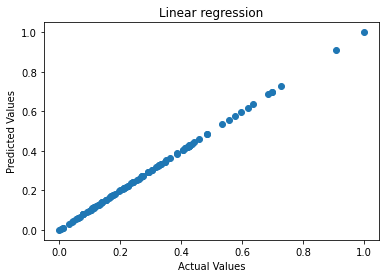

In [42]:
# Visualize the result
# Linear regression
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear regression")
plt.show()


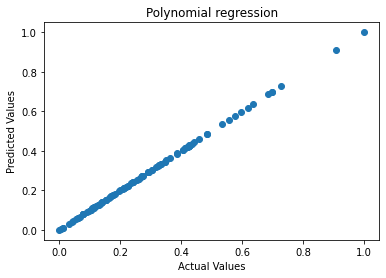

In [45]:
# Polynomial regression
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial regression")
plt.show()

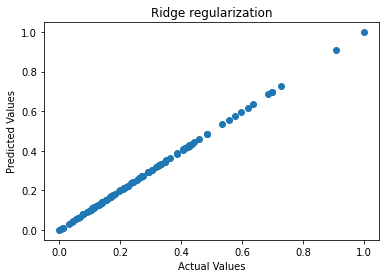

In [48]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge regularization")
plt.show()

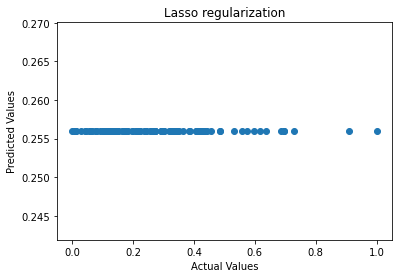

In [49]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso regularization")
plt.show()

In [56]:
# Analyze accuracy of prediction for linear regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Absolute Error: 1.505930194878917e-16
Mean Squared Error: 3.8724839625662704e-32
Root Mean Square Error: 1.9678627905843107e-16
R-squared Score: 1.0


In [57]:
# Analyze accuracy of prediction for Polynomial regression

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error:", mae_poly)
print("Mean Squared Error:", mse_poly)
print("Root Mean Square Error:", rmse_poly)
print("R-squared:", r2_poly)

Mean Absolute Error: 6.1359752615141e-06
Mean Squared Error: 1.1487351548961743e-09
Root Mean Square Error: 3.389299566128928e-05
R-squared: 0.9999999696820632


In [59]:
# Analyze accuracy of prediction for Ridge and Lasso regularization
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('-----Ridge regularization-----')
print("Mean Absolute Error:", mae_ridge)
print("Mean Squared Error: ", mse_ridge)
print("Root Mean Square Error:", rmse_ridge)
print("R-squared:", r2_ridge)

print('-----Lasso regularization-----')
print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error: ", mse_lasso)
print("Root Mean Square Error:", rmse_lasso)
print("R-squared:", r2_lasso)

-----Ridge regularization-----
Mean Absolute Error: 0.00027537904863190934
Mean Squared Error:  1.322351739052489e-07
Root Mean Square Error: 0.0003636415459009722
R-squared: 0.9999965099895882
-----Lasso regularization-----
Mean Absolute Error: 0.15139606986454052
Mean Squared Error:  0.038568818816935684
Root Mean Square Error: 0.19638945699027655
R-squared: -0.017925679424830143
